# Data Mining Final Project
**Objective:**
- Using 2 predictive models (Logistic Regression and Decision Tree) to predict Bank’s customers subscription
- Find out which demographic and campaign-related factors are most influential in determining whether a client will subscribe to a term deposit

**Process:**
- Use a customer dataset with features like usage behavior, demographics, and subscription details
- Preprocess the data: handle missing values, encode categorical variables, and scale numerical features
- Train and optimize the two models

**Evaluation:**
- Use accuracy, precision, recall, and F1 score to evaluate the classifier
- Plot a confusion matrix and ROC curve to assess model performance

## Dataset Overview

In [58]:
import pandas as pd
import numpy as np

df = pd.read_csv("bank.csv", delimiter = ";")
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4521 entries, 0 to 4520
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        4521 non-null   int64 
 1   job        4521 non-null   object
 2   marital    4521 non-null   object
 3   education  4521 non-null   object
 4   default    4521 non-null   object
 5   balance    4521 non-null   int64 
 6   housing    4521 non-null   object
 7   loan       4521 non-null   object
 8   contact    4521 non-null   object
 9   day        4521 non-null   int64 
 10  month      4521 non-null   object
 11  duration   4521 non-null   int64 
 12  campaign   4521 non-null   int64 
 13  pdays      4521 non-null   int64 
 14  previous   4521 non-null   int64 
 15  poutcome   4521 non-null   object
 16  y          4521 non-null   object
dtypes: int64(7), object(10)
memory usage: 600.6+ KB


**Dataset description:** 

The dataset contains 4521 observations and 16 features (7 numerical and 9 categorical) as follow:

- age (numeric)
- job : type of job (categorical: "admin.","unknown","unemployed","management","housemaid","entrepreneur","student",
- "blue-collar","self-employed","retired","technician","services")
- marital : marital status (categorical: "married","divorced","single"; note: "divorced" means divorced or widowed)
- education (categorical: "unknown","secondary","primary","tertiary")
- default: has credit in default? (binary: "yes","no")
- balance: average yearly balance, in euros (numeric)
- housing: has a housing loan? (binary: "yes","no")
- loan: has a personal loan? (binary: "yes","no")
- contact: contact communication type (categorical: "unknown","telephone","cellular")
- day: last contact day of the month (numeric)
- month: last contact month of year (categorical: "jan", "feb", "mar", ..., "nov", "dec")
- duration: last contact duration, in seconds (numeric)
- campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)
- pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric, -1 means client was not previously contacted)
- previous: number of contacts performed before this campaign and for this client (numeric)
- poutcome: outcome of the previous marketing campaign (categorical: "unknown","other","failure","success")

and the target variable:

- y (target): has the client subscribed a term deposit? (binary: "yes","no")

## Exploratory Data Analysis

### Target variable

y
no     0.88476
yes    0.11524
Name: proportion, dtype: float64
y
no     4000
yes     521
Name: count, dtype: int64


/var/folders/r0/9c1jcjws6n9bdshp6xq38bnr0000gn/T/ipykernel_72376/3273533976.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df['y'], palette="viridis")


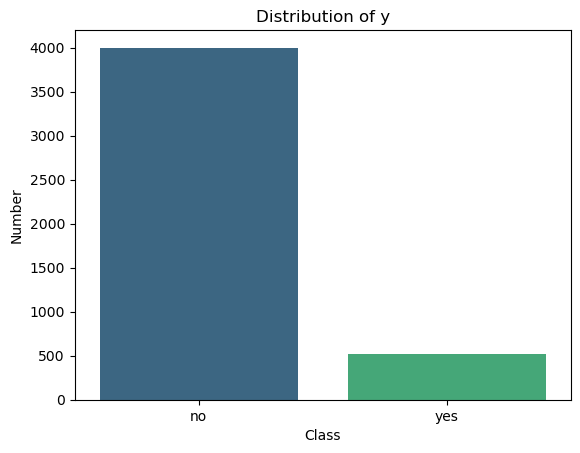

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt

# Count number of observation per class
print(df['y'].value_counts(normalize=True))  # Percentage
print(df['y'].value_counts())  # Number of sample

# Plot a bar chart
sns.countplot(x=df['y'], palette="viridis")
plt.title("Distribution of y")
plt.xlabel("Class")
plt.ylabel("Number")
plt.show()

**Note:** The dataset is strongly imbalance while there are only 11.5% of the minority class - where the customers subscribe to the bank’s marketing campaign.

### Numerical features

In [16]:
df.describe()

,age,balance,day,duration,campaign,pdays,previous
count,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000
mean,41.170095,1422.657819,15.915284,263.961292,2.793630,39.766645,0.542579
std,10.576211,3009.638142,8.247667,259.856633,3.109807,100.121124,1.693562
min,19.000000,-3313.000000,1.000000,4.000000,1.000000,-1.000000,0.000000
25%,33.000000,69.000000,9.000000,104.000000,1.000000,-1.000000,0.000000
50%,39.000000,444.000000,16.000000,185.000000,2.000000,-1.000000,0.000000
75%,49.000000,1480.000000,21.000000,329.000000,3.000000,-1.000000,0.000000
max,87.000000,71188.000000,31.000000,3025.000000,50.000000,871.000000,25.000000



Distribution of numerical features:


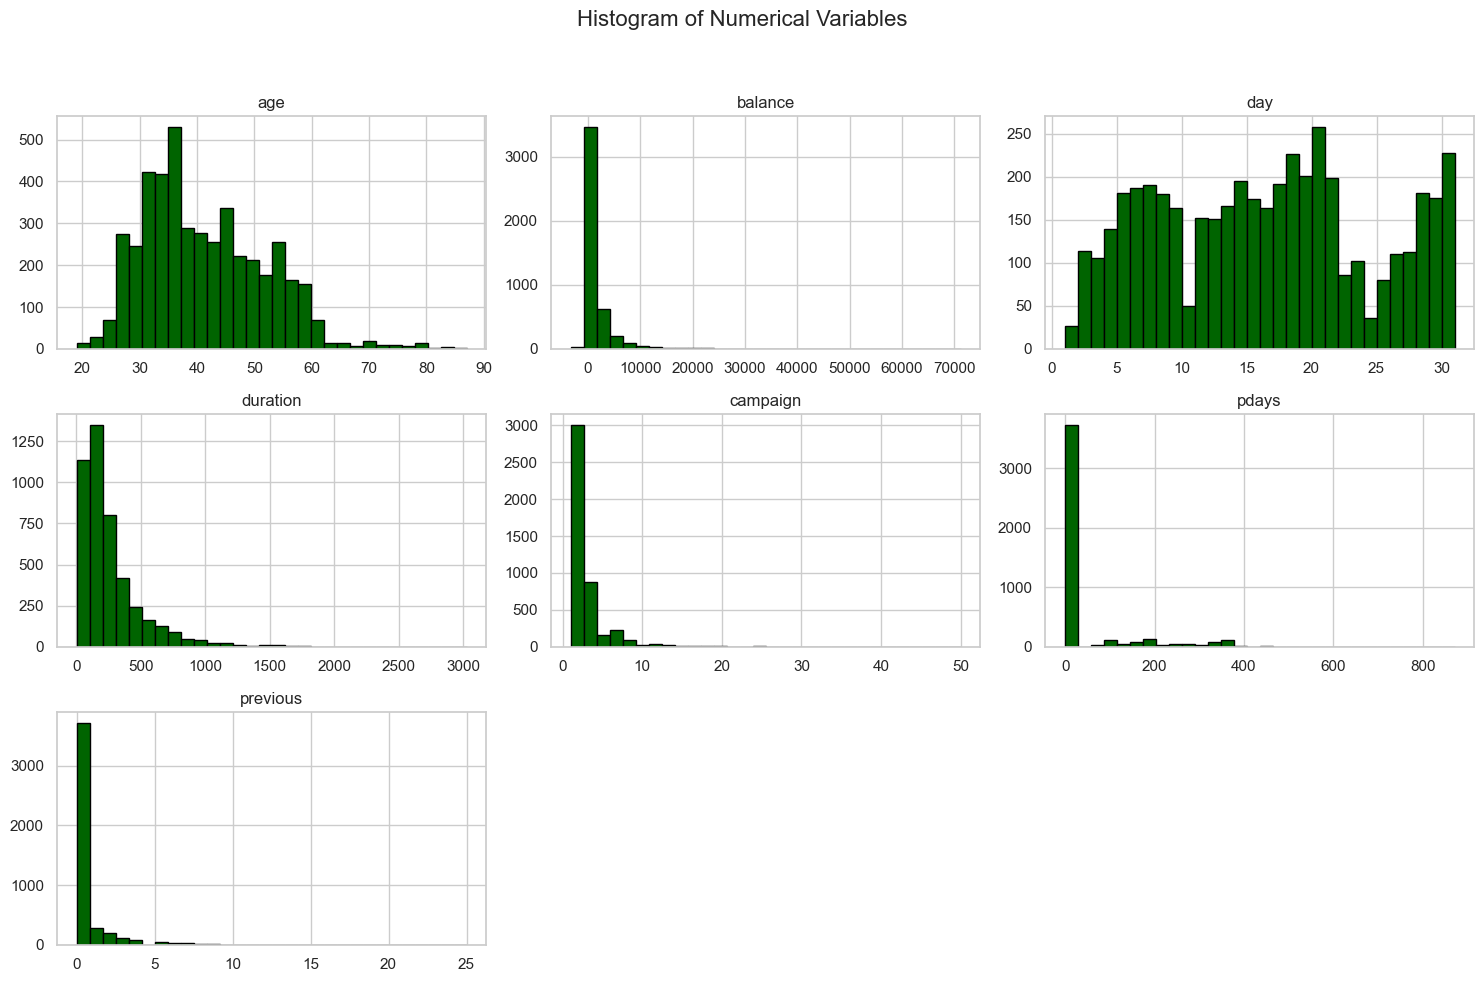


Boxplot:


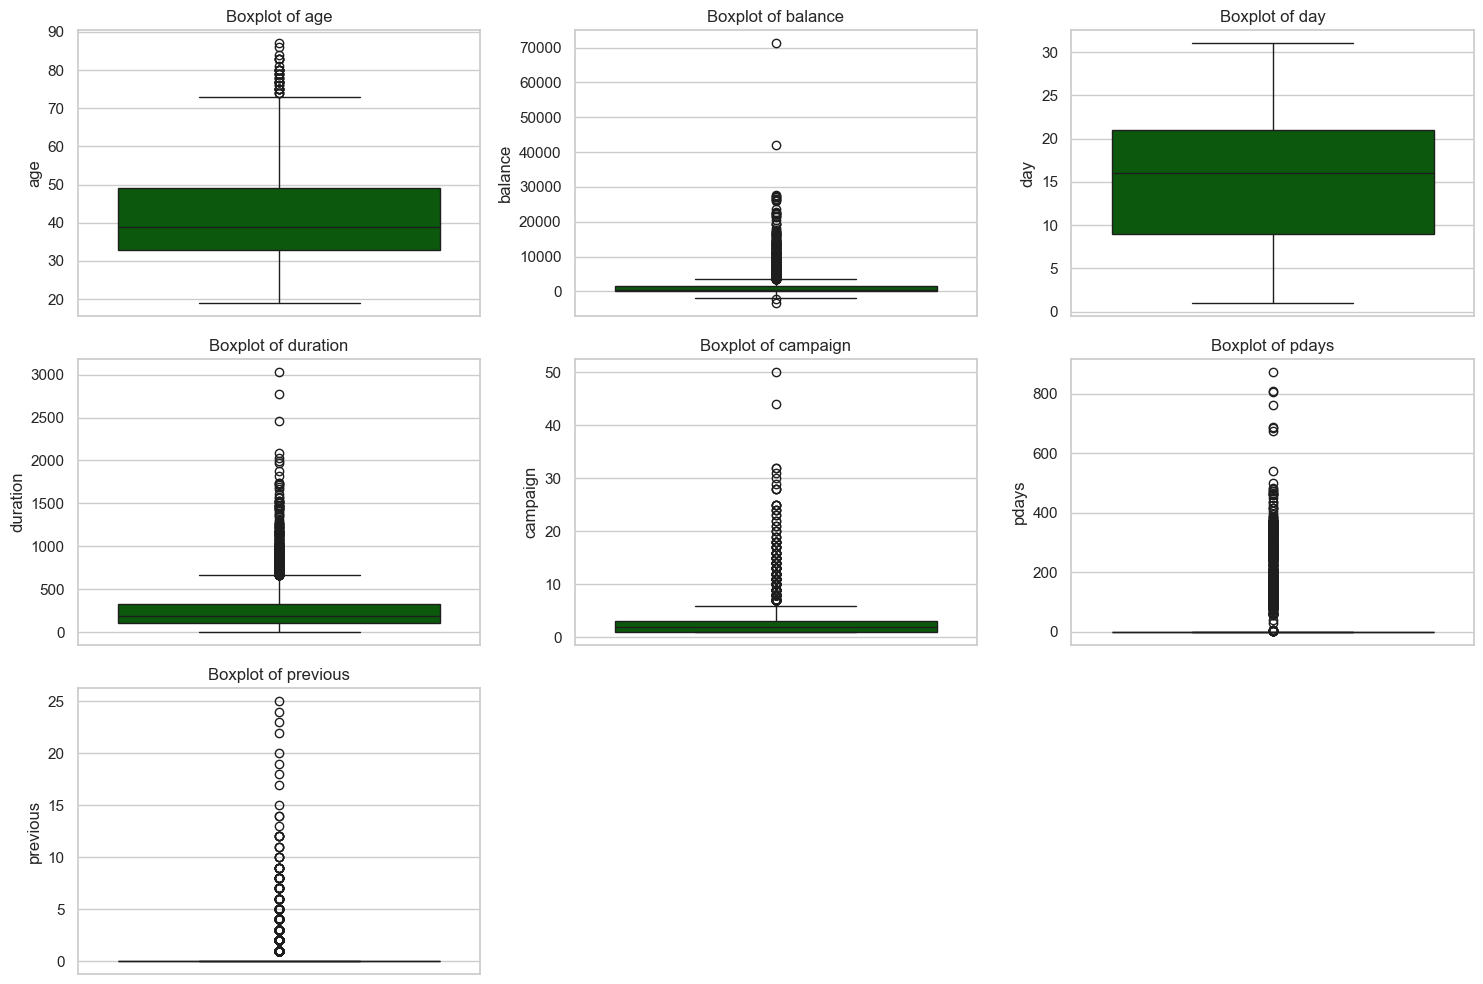


Pairplot:


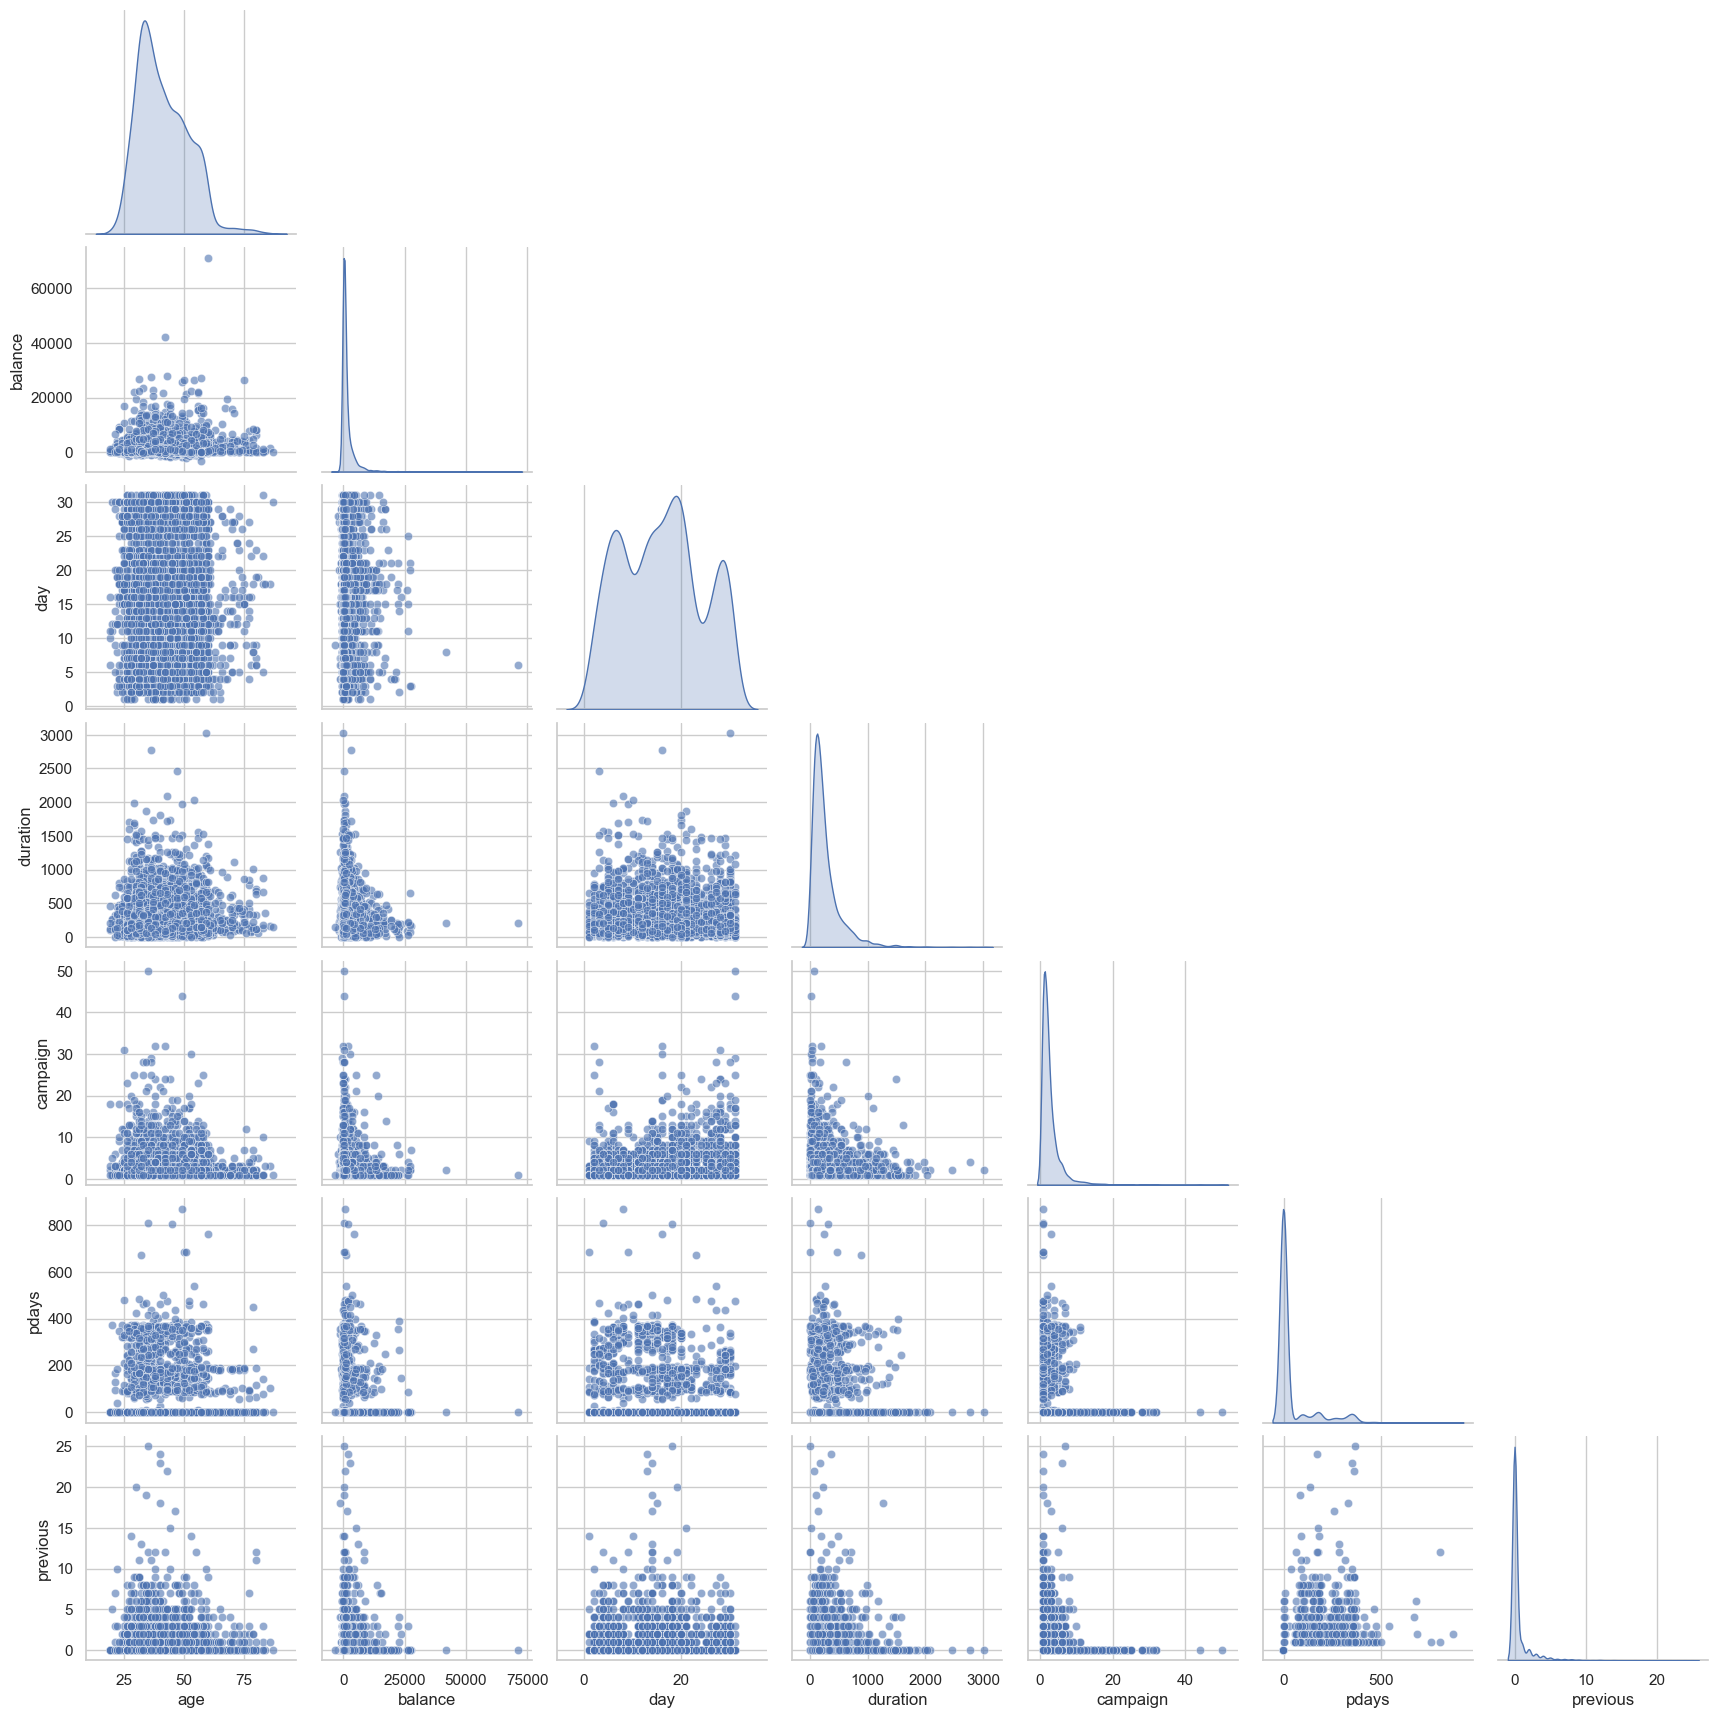

In [21]:
# Style of the chart
sns.set(style="whitegrid")

# Define numerical features
numerical_cols = df.select_dtypes(include=['int64']).columns

# Histogram 
print("\nDistribution of numerical features:")
df[numerical_cols].hist(bins=30, figsize=(15, 10), color='darkgreen', edgecolor='black')
plt.suptitle('Histogram of Numerical Variables', fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

# Boxplot 
print("\nBoxplot:")
plt.figure(figsize=(15, 10))
for i, col in enumerate(numerical_cols, 1):
    plt.subplot(3, 3, i)
    sns.boxplot(y=df[col], color='darkgreen')
    plt.title(f"Boxplot of {col}")
plt.tight_layout()
plt.show()

# Pairplot 
print("\nPairplot:")
sns.pairplot(df[numerical_cols], diag_kind='kde', corner=True, plot_kws={'alpha':0.6})
plt.show()

**Note:** There is no co-linearity between the numerical features

### Categorical features

In [18]:
df.describe(include = ["object"])

,job,marital,education,default,housing,loan,contact,month,poutcome,y
count,4521,4521,4521,4521,4521,4521,4521,4521,4521,4521
unique,12,3,4,2,2,2,3,12,4,2
top,management,married,secondary,no,yes,no,cellular,may,unknown,no
freq,969,2797,2306,4445,2559,3830,2896,1398,3705,4000



Categorical features:


/var/folders/r0/9c1jcjws6n9bdshp6xq38bnr0000gn/T/ipykernel_72376/1893852231.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, palette="pastel", order=df[col].value_counts().index)
/var/folders/r0/9c1jcjws6n9bdshp6xq38bnr0000gn/T/ipykernel_72376/1893852231.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, palette="pastel", order=df[col].value_counts().index)
/var/folders/r0/9c1jcjws6n9bdshp6xq38bnr0000gn/T/ipykernel_72376/1893852231.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col

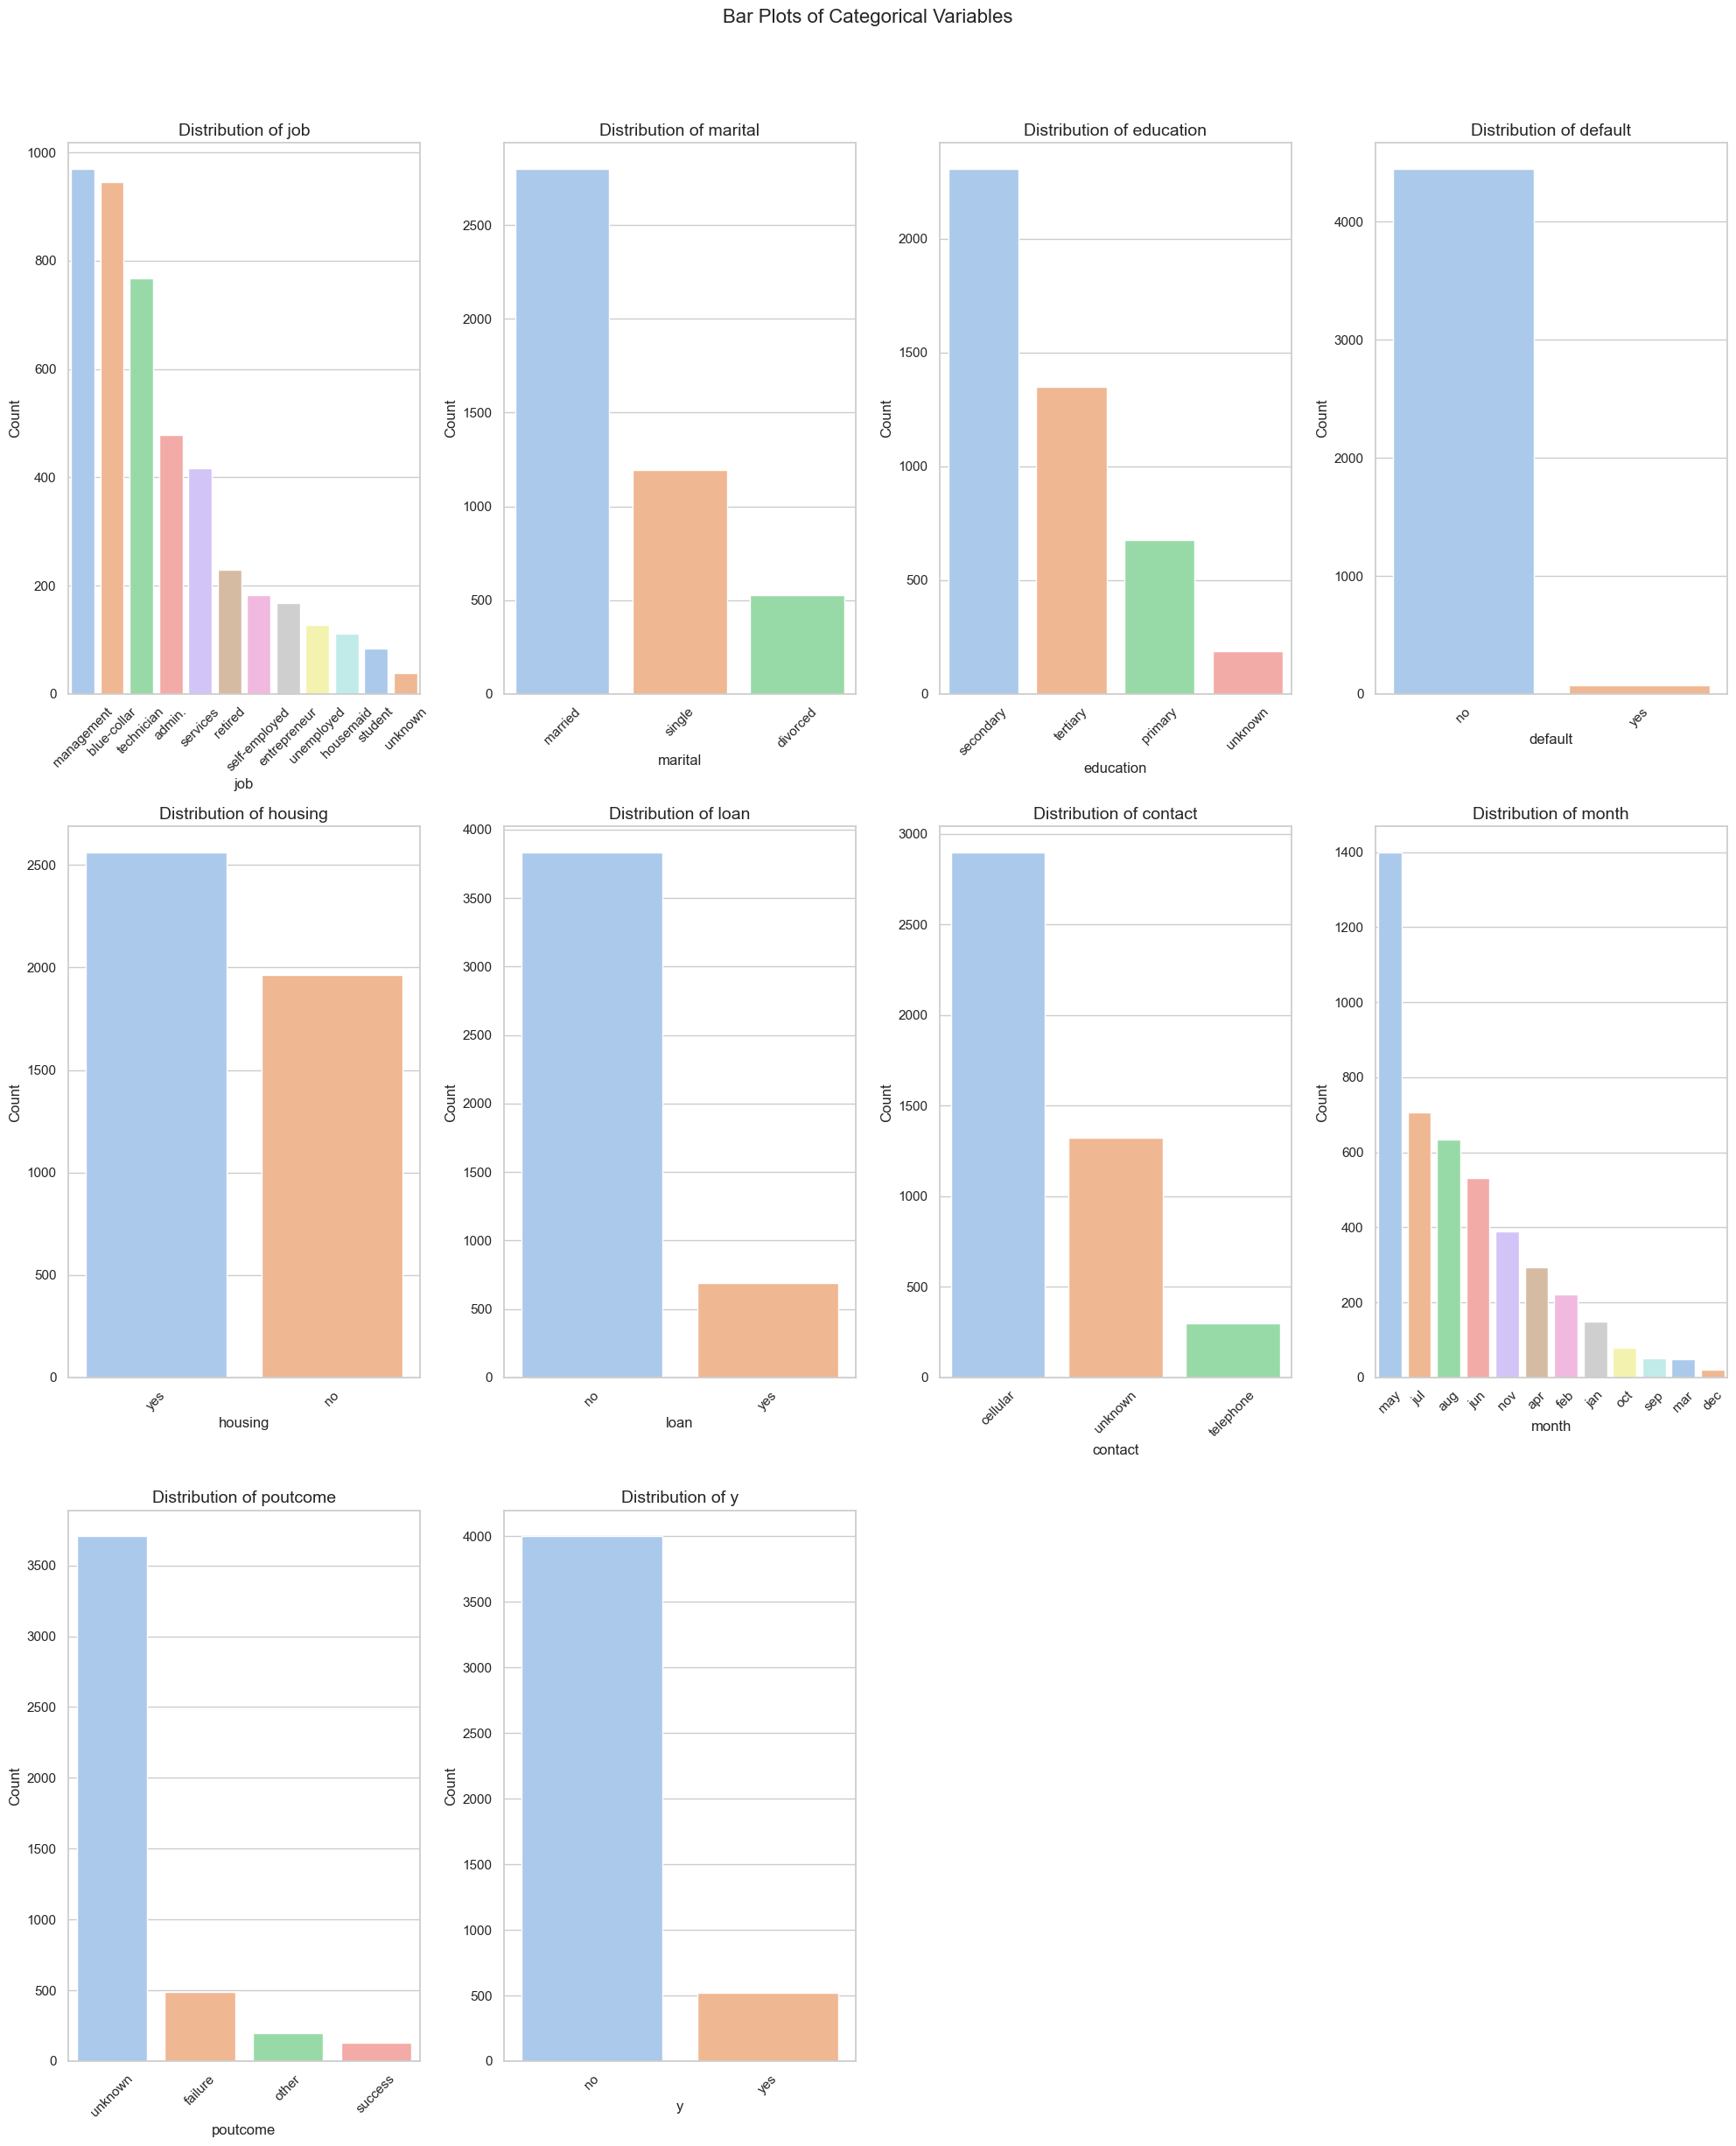

In [25]:
# Define categorical features
categorical_cols = df.select_dtypes(include='object').columns

# Bar plot
print("\nCategorical features:")
plt.figure(figsize=(20, 25))

for i, col in enumerate(categorical_cols, 1):
    plt.subplot(3, 4, i)
    sns.countplot(data=df, x=col, palette="pastel", order=df[col].value_counts().index)
    plt.title(f"Distribution of {col}", fontsize=14)
    plt.xlabel(col, fontsize=12)
    plt.ylabel('Count', fontsize=12)
    plt.xticks(rotation=45)
    plt.tight_layout()

plt.suptitle("Bar Plots of Categorical Variables", fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

## Model Training, Optimizing and Evaluation
During this phase, I did experiments with two techniques (feature engineering and SMOTE) and compared the effectiveness of them using key metrics such as accuracy, recall, precision, f1-score, AUC

### Original dataset

#### Data Preprocessing

In [31]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.model_selection import train_test_split

In [60]:
# Transform the target variable
df['y'] = df['y'].map({'yes': 1, 'no': 0})

In [62]:
# Split the dataset
X = df.drop(columns = ["y"])
y = df["y"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state = 42)

In [64]:
#1. select columns for one-hot encoding and normalization
num_labels = X_train.select_dtypes('int64').columns
cat_labels = X_train.select_dtypes('object').columns

#2. define preprocessors for each columns group
 
num_preprocessor =  StandardScaler()
cat_preprocessor = OneHotEncoder(drop = 'first') 
 
#3. combine it all together 
preprocessor = ColumnTransformer([('cat', cat_preprocessor, cat_labels),
                                 ('num', num_preprocessor, num_labels)])

#### Model Training and Evaluation
##### Model I: Logistic Regression

In [44]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score

In [66]:
lr_pipe = Pipeline(steps=[
    ('preprocessor', preprocessor),  
    ('classifier', LogisticRegression())  
])

lr_pipe.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('cat',
                                                  OneHotEncoder(drop='first'),
                                                  Index(['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact',
       'month', 'poutcome'],
      dtype='object')),
                                                 ('num', StandardScaler(),
                                                  Index(['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous'], dtype='object'))])),
                ('classifier', LogisticRegression())])

In [68]:
# Prediction
y_pred = lr_pipe.predict(X_test)
y_pred_proba = lr_pipe.predict_proba(X_test)[:, 1]

<Axes: ylabel='Count'>

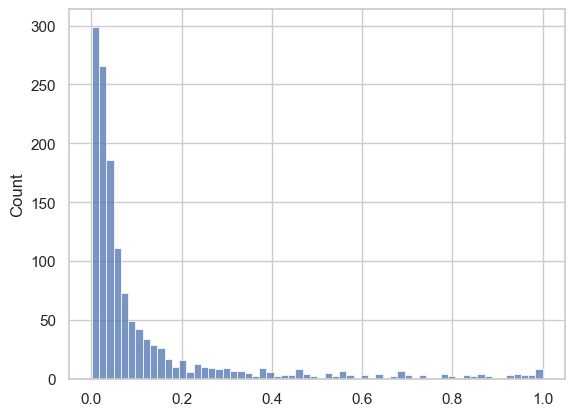

In [70]:
sns.histplot(y_pred_proba)

In [76]:
# Evaluation
print("Classification report:")
print(classification_report(y_test, y_pred))

print("Confusion matrix:")
print(confusion_matrix(y_test, y_pred))

print("AUC:")
print(roc_auc_score(y_test, y_pred_proba))

Classification report:
              precision    recall  f1-score   support

           0       0.92      0.97      0.94      1205
           1       0.58      0.33      0.42       152

    accuracy                           0.90      1357
   macro avg       0.75      0.65      0.68      1357
weighted avg       0.88      0.90      0.89      1357

Confusion matrix:
[[1169   36]
 [ 102   50]]
AUC:
0.8896047171871587


In [90]:
def plot_roc(y_test, prob, model_name = ""):
    
    from sklearn.metrics import roc_curve, roc_auc_score
    import matplotlib.pyplot as plt
    
    fpr, recall, tresh = roc_curve(y_test, prob)
    auc = roc_auc_score(y_test, prob)
    
    plt.plot(fpr, recall, label = "{} AUC = {}".format(model_name, auc.round(2)))
    plt.plot([0,1], [0,1], 'r--')
    plt.xlabel("FPR")
    plt.ylabel("Recall")
    plt.title("ROC Curve")
    plt.legend()

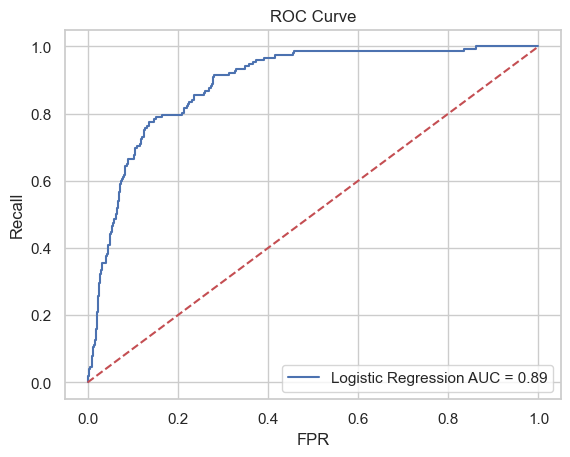

In [94]:
plot_roc(y_test, y_pred_proba, model_name = "Logistic Regression")

**Note:**
- **Precision (0.58):** Precision above average means that out of all the customers that the model predicts as "Yes", only 58% are actually registered customers

**→ High False Positive, the model is not really effective**

- **Recall (0.33):** Recall is very low for the "Yes" class, meaning that the model misses 67% of potential customers. **This is a serious problem because missing registered customers means losing marketing opportunities and revenue.**
- **F1-score (0.42):** Low F1-Score shows that the model is not well balanced between Precision and Recall.
- **Accuracy (0.9):** Accuracy is high but is not a suitable index for the problem of data imbalanceness

##### Model II: Decision Tree

In [82]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier(random_state = 42) 
dt_pipe = Pipeline([('pre', preprocessor),
                    ('tree', dt)])
dt_pipe.fit(X_train, y_train)

Pipeline(steps=[('pre',
                 ColumnTransformer(transformers=[('cat',
                                                  OneHotEncoder(drop='first'),
                                                  Index(['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact',
       'month', 'poutcome'],
      dtype='object')),
                                                 ('num', StandardScaler(),
                                                  Index(['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous'], dtype='object'))])),
                ('tree', DecisionTreeClassifier(random_state=42))])

In [84]:
pred_dt = dt_pipe.predict(X_test) 
pred_dt

array([0, 0, 0, ..., 0, 0, 0])

In [86]:
confusion_matrix(y_test, pred_dt)

array([[1115,   90],
       [  89,   63]])

In [88]:
print(classification_report(y_test, pred_dt))

              precision    recall  f1-score   support

           0       0.93      0.93      0.93      1205
           1       0.41      0.41      0.41       152

    accuracy                           0.87      1357
   macro avg       0.67      0.67      0.67      1357
weighted avg       0.87      0.87      0.87      1357



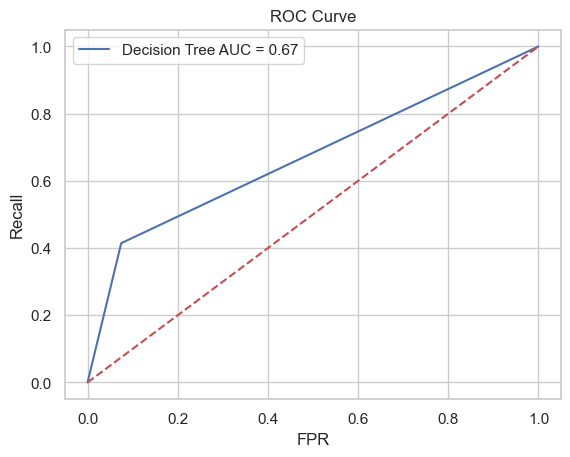

In [92]:
plot_roc(y_test, pred_dt, model_name = 'Decision Tree') 

**Note:**
- **Precision (0.41):** This value indicates that out of all the customers predicted as "Yes," only 41% are actually registered customers. The model suffers from a high false positive rate, leading to inefficiency in targeting actual customers.
- **Recall (0.41):** While recall for "Yes" is moderate, the model misses 41% of potential registered customers, which could result in lost marketing opportunities and revenue.
- **F1-Score (0.41):** A low F1-Score demonstrates that the balance between precision and recall is poor for the minority class.
- **Accuracy (0.84):** The accuracy is high but misleading due to class imbalance. Predicting most samples as "No" inflates accuracy without addressing the minority class effectively.

### Experiment with Feature Engineering method

In [125]:
df = pd.read_csv("bank.csv", delimiter = ";")

In [127]:
# Feature Engineering
df['contacted_before'] = ((df['previous'] != 0) & (df['pdays'] != -1)).astype(int)
df['balance_group'] = pd.cut(df['balance'], bins=[-float('inf'), 0, 100, 1400, float('inf')],
                             labels=['negative', 'low', 'medium', 'high'])
df['high_campaign_intensity'] = (df['campaign'] > 3).astype(int)
df['day_group'] = pd.cut(df['day'], bins=[0, 10, 20, 31],
                         labels=['early_month', 'mid_month', 'late_month'])
df['duration_group'] = pd.cut(df['duration'], bins=[0, 100, 300, float('inf')],
                              labels=['short', 'medium', 'long'])

df.drop(columns=['pdays', 'previous', 'duration', 'balance', 'day', 'campaign'], inplace=True)

df.head()

,age,job,marital,education,default,housing,loan,contact,month,poutcome,y,contacted_before,balance_group,high_campaign_intensity,day_group,duration_group
0,30,unemployed,married,primary,no,no,no,cellular,oct,unknown,no,0,high,0,mid_month,short
1,33,services,married,secondary,no,yes,yes,cellular,may,failure,no,1,high,0,mid_month,medium
2,35,management,single,tertiary,no,yes,no,cellular,apr,failure,no,1,medium,0,mid_month,medium
3,30,management,married,tertiary,no,yes,yes,unknown,jun,unknown,no,0,high,1,early_month,medium
4,59,blue-collar,married,secondary,no,yes,no,unknown,may,unknown,no,0,negative,0,early_month,medium


In [129]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4521 entries, 0 to 4520
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype   
---  ------                   --------------  -----   
 0   age                      4521 non-null   int64   
 1   job                      4521 non-null   object  
 2   marital                  4521 non-null   object  
 3   education                4521 non-null   object  
 4   default                  4521 non-null   object  
 5   housing                  4521 non-null   object  
 6   loan                     4521 non-null   object  
 7   contact                  4521 non-null   object  
 8   month                    4521 non-null   object  
 9   poutcome                 4521 non-null   object  
 10  y                        4521 non-null   object  
 11  contacted_before         4521 non-null   int64   
 12  balance_group            4521 non-null   category
 13  high_campaign_intensity  4521 non-null   int64   
 14  day_grou

In [131]:
# Correct data type of columns
convert_dict = {
    'high_campaign_intensity': 'object',
    'contacted_before': 'object'
}
df = df.astype(convert_dict)

In [133]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4521 entries, 0 to 4520
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype   
---  ------                   --------------  -----   
 0   age                      4521 non-null   int64   
 1   job                      4521 non-null   object  
 2   marital                  4521 non-null   object  
 3   education                4521 non-null   object  
 4   default                  4521 non-null   object  
 5   housing                  4521 non-null   object  
 6   loan                     4521 non-null   object  
 7   contact                  4521 non-null   object  
 8   month                    4521 non-null   object  
 9   poutcome                 4521 non-null   object  
 10  y                        4521 non-null   object  
 11  contacted_before         4521 non-null   object  
 12  balance_group            4521 non-null   category
 13  high_campaign_intensity  4521 non-null   object  
 14  day_grou

#### Data Preprocessing

In [135]:
# Transform the target variable
df['y'] = df['y'].map({'yes': 1, 'no': 0})

In [137]:
# Split the dataset
X = df.drop(columns = ["y"])
y = df["y"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state = 42)

In [145]:
#1. select columns for one-hot encoding and normalization
num_labels = X_train.select_dtypes('int64').columns
cat_labels = X_train.select_dtypes(include=['object', 'category']).columns

#2. define preprocessors for each columns group
 
num_preprocessor =  StandardScaler()
cat_preprocessor = OneHotEncoder(drop = 'first') 
 
#3. combine it all together 
preprocessor = ColumnTransformer([('cat', cat_preprocessor, cat_labels),
                                 ('num', num_preprocessor, num_labels)])

#### Model Training and Evaluation

##### Model I: Logistic Regression

In [152]:
lr_pipe = Pipeline(steps=[
    ('preprocessor', preprocessor),  
    ('classifier', LogisticRegression())  
])

lr_pipe.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('cat',
                                                  OneHotEncoder(drop='first'),
                                                  Index(['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact',
       'month', 'poutcome', 'contacted_before', 'balance_group',
       'high_campaign_intensity', 'day_group', 'duration_group'],
      dtype='object')),
                                                 ('num', StandardScaler(),
                                                  Index(['age'], dtype='object'))])),
                ('classifier', LogisticRegression())])

In [154]:
# Prediction
y_pred = lr_pipe.predict(X_test)
y_pred_proba = lr_pipe.predict_proba(X_test)[:, 1]

In [156]:
# Evaluation
print("Classification report:")
print(classification_report(y_test, y_pred))

print("Confusion matrix:")
print(confusion_matrix(y_test, y_pred))

print("AUC:")
print(roc_auc_score(y_test, y_pred_proba))

Classification report:
              precision    recall  f1-score   support

           0       0.90      0.98      0.94      1205
           1       0.59      0.18      0.27       152

    accuracy                           0.89      1357
   macro avg       0.75      0.58      0.61      1357
weighted avg       0.87      0.89      0.87      1357

Confusion matrix:
[[1186   19]
 [ 125   27]]
AUC:
0.8678368639440925


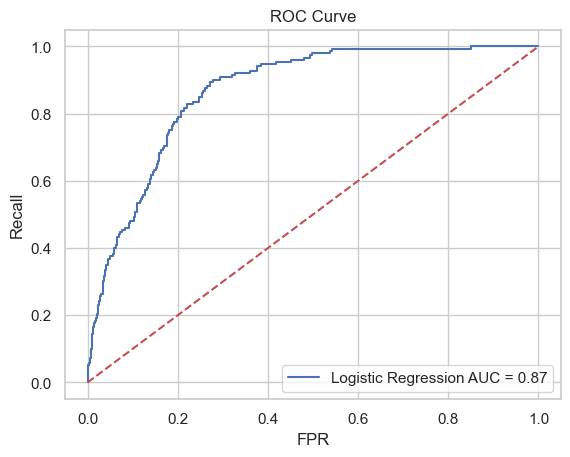

In [158]:
plot_roc(y_test, y_pred_proba, model_name = "Logistic Regression")

##### Model II: Decision Tree

In [161]:
dt = DecisionTreeClassifier(random_state = 42) 
dt_pipe = Pipeline([('pre', preprocessor),
                    ('tree', dt)])
dt_pipe.fit(X_train, y_train)

Pipeline(steps=[('pre',
                 ColumnTransformer(transformers=[('cat',
                                                  OneHotEncoder(drop='first'),
                                                  Index(['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact',
       'month', 'poutcome', 'contacted_before', 'balance_group',
       'high_campaign_intensity', 'day_group', 'duration_group'],
      dtype='object')),
                                                 ('num', StandardScaler(),
                                                  Index(['age'], dtype='object'))])),
                ('tree', DecisionTreeClassifier(random_state=42))])

In [163]:
pred_dt = dt_pipe.predict(X_test)

In [165]:
# Evaluation
print("Classification report:")
print(classification_report(y_test, pred_dt))

print("Confusion matrix:")
print(confusion_matrix(y_test, pred_dt))

Classification report:
              precision    recall  f1-score   support

           0       0.92      0.89      0.91      1205
           1       0.31      0.38      0.34       152

    accuracy                           0.84      1357
   macro avg       0.61      0.63      0.62      1357
weighted avg       0.85      0.84      0.84      1357

Confusion matrix:
[[1077  128]
 [  95   57]]


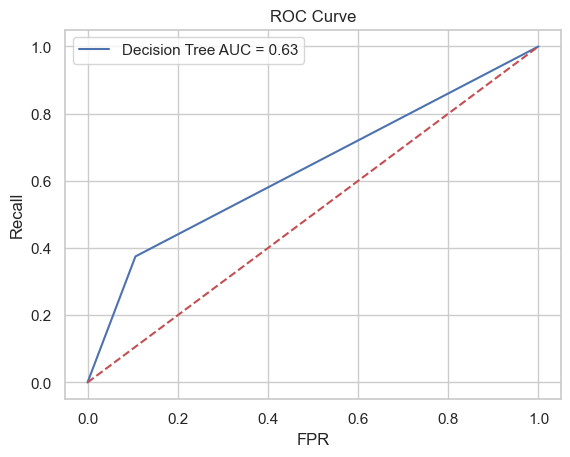

In [167]:
plot_roc(y_test, pred_dt, model_name = 'Decision Tree') 

**Note:**
- In general, the two models' performances on the feature engineered dataset are not good compared to the original dataset

### SMOTE method

In [172]:
df = pd.read_csv("bank.csv", delimiter = ";")

In [174]:
df['y'] = df['y'].map({'yes': 1, 'no': 0})

In [176]:
X = df.drop(columns = ["y"])
y = df["y"]

In [180]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
for column in X.select_dtypes(include=['object']).columns:
    X[column] = le.fit_transform(X[column])

In [182]:
from imblearn.over_sampling import SMOTE
from collections import Counter

counter = Counter(y)
print('Before', counter)

# oversampling the train dataset using SMOTE
smt = SMOTE()
X_sm, y_sm = smt.fit_resample(X, y)

counter = Counter(y_sm)
print('After', counter)

Before Counter({0: 4000, 1: 521})
After Counter({0: 4000, 1: 4000})


#### Data Preprocessing

In [184]:
X_train, X_test, y_train, y_test = train_test_split(X_sm, y_sm, test_size=0.3, random_state = 42)

In [189]:
#1. select columns for one-hot encoding and normalization
num_labels = X_train.select_dtypes('number').columns
cat_labels = X_train.select_dtypes('object').columns

#2. define preprocessors for each columns group 
num_preprocessor =  StandardScaler()
cat_preprocessor = OneHotEncoder(drop = 'first') # we reject the first one so that there is no collinearity
 
#3. combine it all together 
preprocessor = ColumnTransformer([('cat', cat_preprocessor, cat_labels),
                                 ('num', num_preprocessor, num_labels)])

#### Model Training and Evaluation

##### Model I: Logistic Regression

In [193]:
lr_pipe = Pipeline(steps=[
    ('preprocessor', preprocessor),  
    ('classifier', LogisticRegression())  
])

lr_pipe.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('cat',
                                                  OneHotEncoder(drop='first'),
                                                  Index([], dtype='object')),
                                                 ('num', StandardScaler(),
                                                  Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome'],
      dtype='object'))])),
                ('classifier', LogisticRegression())])

In [195]:
y_pred = lr_pipe.predict(X_test)
y_pred_proba = lr_pipe.predict_proba(X_test)[:, 1]

In [197]:
print("Classification report:")
print(classification_report(y_test, y_pred))

print("Confusion matrix:")
print(confusion_matrix(y_test, y_pred))

print("AUC:")
print(roc_auc_score(y_test, y_pred_proba))

Classification report:
              precision    recall  f1-score   support

           0       0.86      0.83      0.84      1206
           1       0.83      0.87      0.85      1194

    accuracy                           0.85      2400
   macro avg       0.85      0.85      0.85      2400
weighted avg       0.85      0.85      0.85      2400

Confusion matrix:
[[ 997  209]
 [ 160 1034]]
AUC:
0.9175576611637514


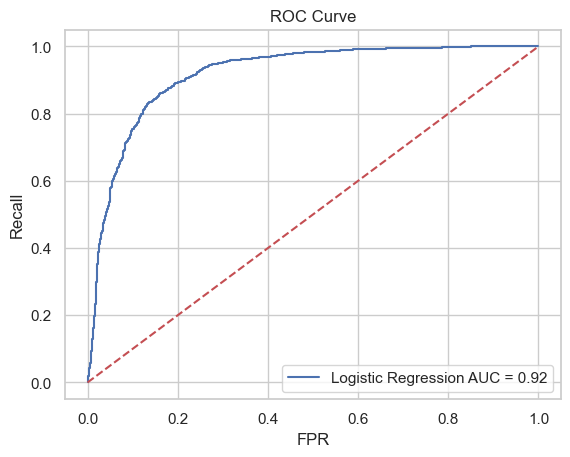

In [199]:
plot_roc(y_test, y_pred_proba, model_name = "Logistic Regression")

**Note:**
- **Precision (Yes) = 0.83: Significant increase,** meaning the model is more accurate in predicting customers who sign up.
- **Recall (Yes) = 0.87: Significant increase,** detecting 87% of customers who actually sign up.
- **F1-Score (Yes) = 0.85: Significant improvement,** showing the model has a good balance between Precision and Recall.
- **Accuracy = 0.85: Decreased** from baseline, but still high
- **AUC = 0.92: Increased** marginally

→ SMOTE **helps the model balance Precision and Recall**, significantly improving over both previous models. The model reduces False Negatives (FN) without increasing False Positives (FP) too much.

##### Model II: Decision Tree

In [205]:
dt = DecisionTreeClassifier(random_state = 42)
dt_pipe = Pipeline([('pre', preprocessor),
                    ('tree', dt)])
dt_pipe.fit(X_train, y_train)

Pipeline(steps=[('pre',
                 ColumnTransformer(transformers=[('cat',
                                                  OneHotEncoder(drop='first'),
                                                  Index([], dtype='object')),
                                                 ('num', StandardScaler(),
                                                  Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome'],
      dtype='object'))])),
                ('tree', DecisionTreeClassifier(random_state=42))])

In [207]:
pred_dt = dt_pipe.predict(X_test)
pred_dt

array([0, 0, 0, ..., 0, 1, 1])

In [209]:
# Evaluation
print("Classification report:")
print(classification_report(y_test, pred_dt))

print("Confusion matrix:")
print(confusion_matrix(y_test, pred_dt))

Classification report:
              precision    recall  f1-score   support

           0       0.89      0.86      0.87      1206
           1       0.86      0.90      0.88      1194

    accuracy                           0.88      2400
   macro avg       0.88      0.88      0.88      2400
weighted avg       0.88      0.88      0.88      2400

Confusion matrix:
[[1032  174]
 [ 124 1070]]


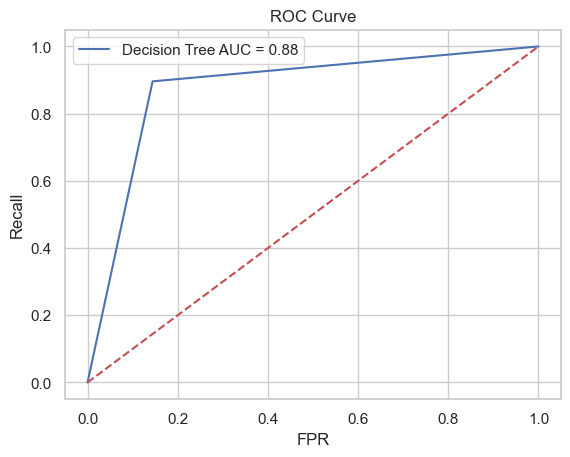

In [211]:
plot_roc(y_test, pred_dt, model_name = 'Decision Tree') 

**Note:**
- **Precision (Yes) = 0.86: Significant increase,** meaning the model is more accurate in predicting customers who sign up.
- **Recall (Yes) = 0.90: Significant increase,** detecting 87% of customers who actually sign up.
- **F1-Score (Yes) = 0.88: Significant improvement,** showing the model has a good balance between Precision and Recall.
- **Accuracy = 0.88: Significant improvement** from baseline
- **AUC = 0.88: Significant improvement** from 0.63 or 0.67

→ SMOTE **helps the model balance Precision and Recall**, significantly improving over previous model on the original and feature engineered datasets. The model reduces False Negatives (FN) significantly, overall improvement.

## Feature Importance

### Model I: Logistic Regression

In [221]:
# Get Coeficients and calculate Odds Ratios
feature_names = preprocessor.get_feature_names_out()
odds_ratios = np.exp(lr_pipe.named_steps['classifier'].coef_[0])

# Create result df
odds_df = pd.DataFrame({'Feature': feature_names, 'Odds Ratio': odds_ratios})
odds_df.sort_values(by='Odds Ratio', ascending=False, inplace=True)

print(odds_df)

           Feature  Odds Ratio
11   num__duration    6.728610
13      num__pdays    1.115891
5     num__balance    1.031725
14   num__previous    0.992681
10      num__month    0.982555
9         num__day    0.963636
1         num__job    0.930861
4     num__default    0.910123
0         num__age    0.836548
3   num__education    0.821115
15   num__poutcome    0.735387
2     num__marital    0.636458
12   num__campaign    0.482876
7        num__loan    0.461389
8     num__contact    0.420359
6     num__housing    0.388506


/var/folders/r0/9c1jcjws6n9bdshp6xq38bnr0000gn/T/ipykernel_72376/3352781882.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=odds_df['Odds Ratio'], y=odds_df['Feature'], palette="viridis")


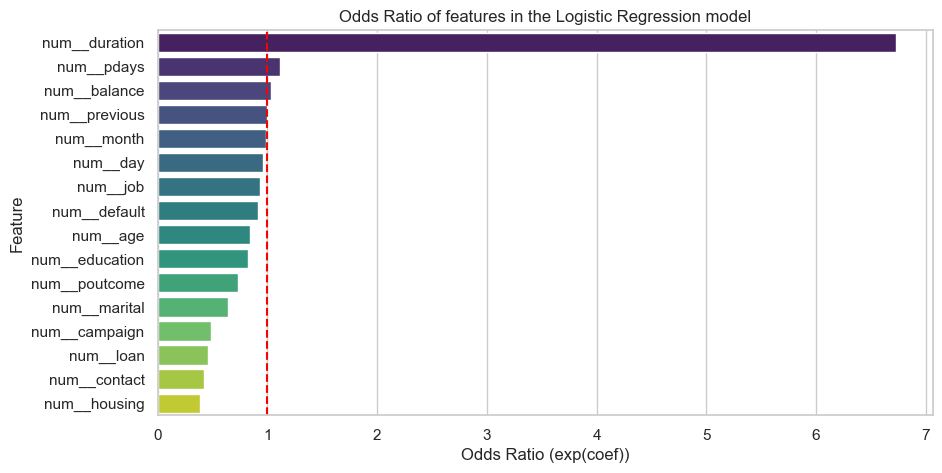

In [227]:
plt.figure(figsize=(10, 5))
sns.barplot(x=odds_df['Odds Ratio'], y=odds_df['Feature'], palette="viridis")


plt.xlabel("Odds Ratio (exp(coef))")
plt.ylabel("Feature")
plt.title("Odds Ratio of features in the Logistic Regression model")
plt.axvline(x=1, color='red', linestyle='--')  
plt.show()

**Note:**
→ The most important feature in the logistic regression model is the “duration”, where an unit increases in duration will increase more than 6 times the chance of customers subscribe to the bank’s deposit, following by pdays, which indicates if the customers had been contacted before, the chance of success will be increased.

### Model II: Decision Tree

In [233]:
features = X_train.columns
model = dt_pipe.named_steps['tree']
importance = model.feature_importances_

importance_df = pd.DataFrame({'Feature': features, 'Importance': importance})
importance_df.sort_values(by='Importance', ascending=False, inplace=True)

print(importance_df)

      Feature  Importance
11   duration    0.376833
8     contact    0.096960
5     balance    0.070905
13      pdays    0.070625
0         age    0.062174
6     housing    0.061667
10      month    0.058867
9         day    0.050471
7        loan    0.035359
1         job    0.029255
12   campaign    0.025409
15   poutcome    0.019309
2     marital    0.018787
3   education    0.014565
14   previous    0.008652
4     default    0.000164


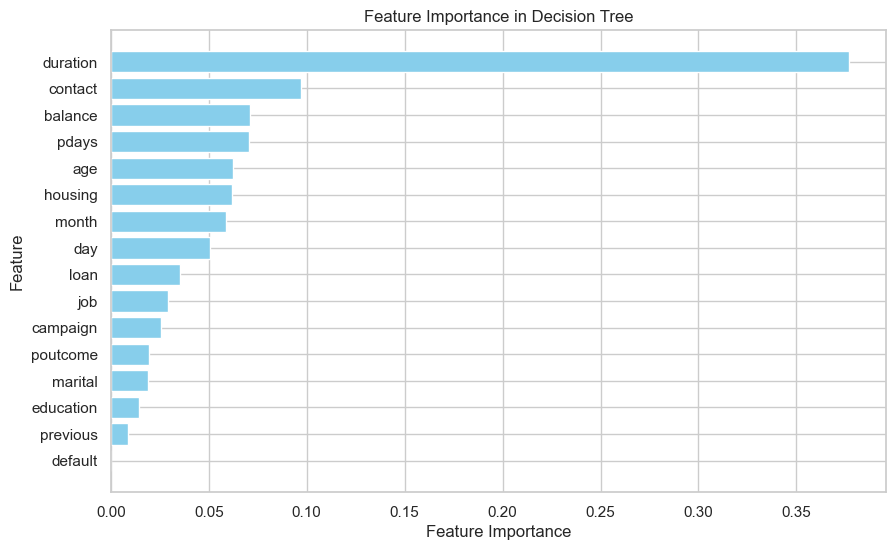

In [235]:
plt.figure(figsize=(10, 6))
plt.barh(importance_df['Feature'], importance_df['Importance'], color='skyblue')
plt.xlabel('Feature Importance')
plt.ylabel('Feature')
plt.title('Feature Importance in Decision Tree')
plt.gca().invert_yaxis()  
plt.show()

**Note:**
→The graph shows quite similar results in terms of feature importance with model I, where duration is also the most important variable in the decision tree model.

## Conclusion

- **Key Factor:**
    - Both models identify **duration** as the most critical factor in determining whether a client will subscribe to a term deposit, highlighting the importance of the length of the last contact.
- **Demographics:**
    - While **age** and **job** have moderate significance in logistic regression, demographic features generally play a smaller role compared to campaign-related factors.
- **Campaign Features:**
    - Campaign-specific elements, such as **contact type** and **number of contacts** (campaign), show less importance in logistic regression compared to decision trees.

Campaign-related features like **duration**, **pdays**, and **balance** are consistently influential across both models, making them key focus areas for improving subscription rates. Logistic regression provides additional insights into the importance of **previous interactions** and **timing** (day of the month). This highlights the need to prioritize both effective communication and strategic timing in marketing campaigns.